## Постановка задачи:

Таблица содержит объявления о продаже автомобилей за 2021 год. Необходимо, по значениям признаков узнать тип машины.

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Установливаем библиотеку Pandas:

In [7]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Импортируем необходимые модули:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [9]:
data = pd.read_csv('Car_sale_ads.csv')
data

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


Выводим первые 10 строк dataset-а:

In [10]:
data.head(10)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,62950,PLN,Used,Abarth,595,NaN,NaN,2016,46060.0,...,Manual,small_cars,3.0,gray,Germany,Yes,15/03/2016,30/04/2021,"Modlińska 157 - 03-186 Warszawa, Białołęka (Po...","['ABS', 'Electric front windows', 'Drivers air..."
6,6,69900,PLN,Used,Abarth,595,NaN,NaN,2021,2900.0,...,Manual,small_cars,2.0,black,Germany,NaN,25/02/2021,29/04/2021,"Żary, żarski, Lubuskie",[]
7,7,69900,PLN,Used,Abarth,500,NaN,NaN,2019,20000.0,...,Manual,small_cars,3.0,white,Poland,Yes,NaN,29/04/2021,"Ojcowska 2 - 02-918 Warszawa, Mokotów (Polska)","['ABS', 'Electrically adjustable mirrors', 'Pa..."
8,8,120750,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,03/05/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
9,9,93100,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,03/05/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


Выводим последние 10 строк dataset-а:

In [11]:
data.tail(10)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
208294,208294,1500,PLN,Used,Zastava,1100,NaN,NaN,1979,106000.0,...,Manual,compact,5.0,green,NaN,NaN,NaN,29/04/2021,"Kwileń 42 - 63-313 Kwileń, pleszewski, Wielkop...",[]
208295,208295,16999,PLN,Used,Zastava,1100,NaN,NaN,1981,62000.0,...,Manual,coupe,3.0,green,NaN,NaN,NaN,25/04/2021,"Konstancin-Jeziorna, piaseczyński, Mazowieckie",[]
208296,208296,1600,PLN,Used,Zastava,Other,NaN,NaN,1998,60000.0,...,Manual,small_cars,3.0,yellow,Poland,Yes,28/05/1999,29/04/2021,"Warszawa, Mazowieckie, Mokotów",[]
208297,208297,19900,PLN,Used,Zastava,1100,NaN,NaN,1981,18712.0,...,Manual,compact,4.0,beige,NaN,NaN,NaN,04/05/2021,"Szczecińska 40 - 75-137 Koszalin, Zachodniopom...",[]
208298,208298,26000,PLN,Used,Zastava,750,NaN,NaN,1978,6000.0,...,Manual,small_cars,2.0,white,Other,NaN,NaN,25/04/2021,"Ostrów Wielkopolski, ostrowski, Wielkopolskie",[]
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]
208303,208303,11900,PLN,Used,Żuk,Other,NaN,NaN,1985,20056.0,...,Manual,minivan,3.0,red,NaN,NaN,NaN,04/05/2021,"Szczecińska 40 - 75-137 Koszalin, Zachodniopom...",[]


### О наборе данных:

Context
This dataset was created by webscraping over 200,000 car offers from one of the largest car advertisement sites in Poland.
The code used to collect and clean the data is available at github: github.com/pt3k/otomoto-webscrape

Content
The dataset contains 208,304 observations of 25 variables.

Variables describtion:

- `ID` - unique ID of offer
- Price - value of the price
- Currency - currency of the price (mostly polish złoty, but also some euro)
- Condition - new or used
- Vehicle_brand - brand of vehicle in offer
- Vehicle_model - model of vehicle in offer
- Vehicle_generation - generation of vehicle in offer
- Vehicle_version - version of vehicle in offer
- Production_year - year of car production
- Mileage_km - total distance that the car has driven in kilometers
- Power_HP - car engine power in horsepower
- Displacement_cm3 - car engine size in cubic centimeters
- Fuel_type - car fuel type
- CO2_emissions - car CO2 emissions in g/km
- Drive - type of car drive
- Transmission - type of car transmission
- Type - car body style
- Doors_number - number of car doors
- Colour - car body color
- Origin_country - country of origin of the car
- First_owner - whether the owner is the first owner
- First_registration_date - date of first registration
- Offer_publication_date - date of publication of the offer
- Offer_location - address provided by the issuer
- Features - listed car features (ABS, airbag, parking sensors e.t.c)

Ознакомимся с некоторыми свойствами Pandas.DataFrame на примере нашего dataset-а:

In [12]:
print(data.shape, end="\n\n")
print(data.columns, end="\n\n")
print(data.index, end="\n\n")
print(data.at[2, 'Vehicle_generation'], end="\n\n")
print(data["Vehicle_generation"][2], end="\n\n")
print(data["Vehicle_generation"].dtype, end="\n\n")
print(type(data["Vehicle_generation"]), end="\n\n")
print(type(data["Vehicle_generation"][2]), end="\n\n")

(208304, 25)

Index(['Index', 'Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'CO2_emissions', 'Drive', 'Transmission', 'Type',
       'Doors_number', 'Colour', 'Origin_country', 'First_owner',
       'First_registration_date', 'Offer_publication_date', 'Offer_location',
       'Features'],
      dtype='object')

RangeIndex(start=0, stop=208304, step=1)

nan

nan

object

<class 'pandas.core.series.Series'>

<class 'float'>



Выведем описательную статистику по нашему dataset-у:

In [13]:
data.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,208304.000000,2.083040e+05,208304.000000,2.073210e+05,207661.000000,206338.000000,9.404700e+04,206817.000000
mean,104151.500000,6.305383e+04,2012.098241,1.502768e+05,151.836281,1882.567147,3.191564e+05,4.637138
std,60132.329574,8.665967e+04,6.998414,2.937447e+06,77.683546,729.609660,7.291396e+07,0.768559
min,0.000000,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,52075.750000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,104151.500000,3.570000e+04,2013.000000,1.445660e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,156227.250000,7.599000e+04,2017.000000,2.060000e+05,172.000000,1997.000000,1.640000e+02,5.000000
max,208303.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


In [14]:
data.describe(include = ['object'])

,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Fuel_type,Drive,Transmission,Type,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
count,208304,208304,208304,208304,138082,147860,208304,193228,207825,208304,208304,118312,65094,86445,208304,208304,208304
unique,2,2,108,1203,19056,569,8,5,2,9,14,37,1,8441,41,13635,177211
top,PLN,Used,Volkswagen,Astra,2.0 TDI,II (2012-),Gasoline,Front wheels,Manual,SUV,black,Poland,Yes,01/01/2017,03/05/2021,"Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)",[]
freq,208034,182850,18455,5302,888,3758,99352,139944,132889,41587,50355,57127,65094,216,26561,1329,13337


In [15]:
data.describe(include = 'all')

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
count,208304.000000,2.083040e+05,208304,208304,208304,208304,138082,147860,208304.000000,2.073210e+05,...,207825,208304,206817.000000,208304,118312,65094,86445,208304,208304,208304
unique,NaN,NaN,2,2,108,1203,19056,569,NaN,NaN,...,2,9,NaN,14,37,1,8441,41,13635,177211
top,NaN,NaN,PLN,Used,Volkswagen,Astra,2.0 TDI,II (2012-),NaN,NaN,...,Manual,SUV,NaN,black,Poland,Yes,01/01/2017,03/05/2021,"Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)",[]
freq,NaN,NaN,208034,182850,18455,5302,888,3758,NaN,NaN,...,132889,41587,NaN,50355,57127,65094,216,26561,1329,13337
mean,104151.500000,6.305383e+04,NaN,NaN,NaN,NaN,NaN,NaN,2012.098241,1.502768e+05,...,NaN,NaN,4.637138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,60132.329574,8.665967e+04,NaN,NaN,NaN,NaN,NaN,NaN,6.998414,2.937447e+06,...,NaN,NaN,0.768559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,5.000000e+02,NaN,NaN,NaN,NaN,NaN,NaN,1915.000000,1.000000e+00,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,52075.750000,1.780000e+04,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,5.300000e+04,...,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,104151.500000,3.570000e+04,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,1.445660e+05,...,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,156227.250000,7.599000e+04,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,2.060000e+05,...,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выведем матрицу графиков рессеивания (запускать на свой стах и риск):

In [16]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

Выведем матрицу корреляции наших численных признаков:

In [17]:
data.corr()

C:\Users\nick\AppData\Local\Temp\ipykernel_17784\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
Index,1.000000,-0.106673,0.016147,0.002439,-0.230675,-0.206394,-0.003739,0.073687
Price,-0.106673,1.000000,0.441425,-0.017602,0.641298,0.362415,-0.001300,-0.034275
Production_year,0.016147,0.441425,1.000000,-0.040204,0.171774,-0.154144,-0.007817,0.252298
Mileage_km,0.002439,-0.017602,-0.040204,1.000000,-0.003567,0.006477,0.004679,-0.006830
Power_HP,-0.230675,0.641298,0.171774,-0.003567,1.000000,0.811457,0.012352,-0.139346
Displacement_cm3,-0.206394,0.362415,-0.154144,0.006477,0.811457,1.000000,0.020508,-0.197962
CO2_emissions,-0.003739,-0.001300,-0.007817,0.004679,0.012352,0.020508,1.000000,-0.004102
Doors_number,0.073687,-0.034275,0.252298,-0.006830,-0.139346,-0.197962,-0.004102,1.000000


Визуализируем данную матрицу корреляции:

In [18]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\nick\AppData\Local\Temp\ipykernel_17784\4293635737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


<AxesSubplot: >

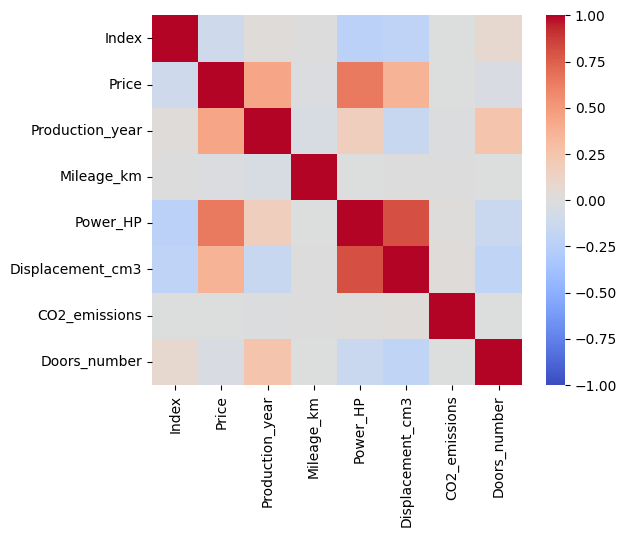

In [19]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

По данной матрице можно сделать вывод, что общая корреляция данных мала

Визуализируем некоторые графики корреляции:

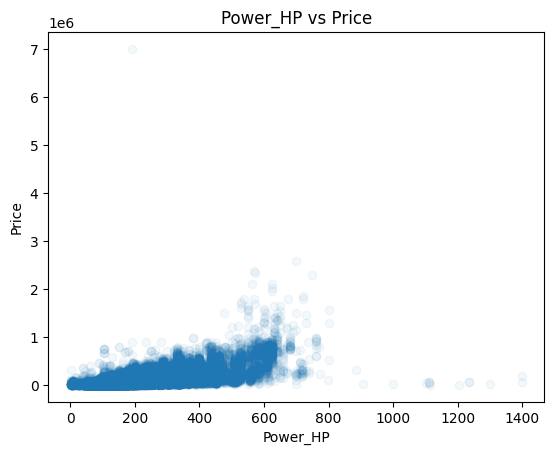

In [20]:
plt.plot(data['Power_HP'], data['Price'], 'o', alpha = 0.05)
plt.xlabel('Power_HP')
plt.ylabel('Price')
plt.title('Power_HP vs Price')
pass

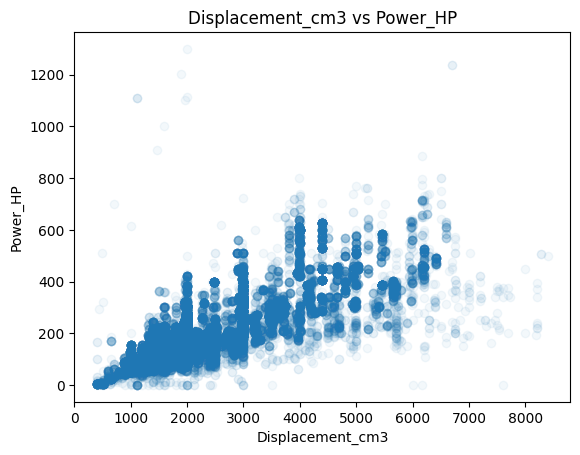

In [21]:
plt.plot(data['Displacement_cm3'], data['Power_HP'], 'o', alpha = 0.05)
plt.xlabel('Displacement_cm3')
plt.ylabel('Power_HP')
plt.title('Displacement_cm3 vs Power_HP')
pass

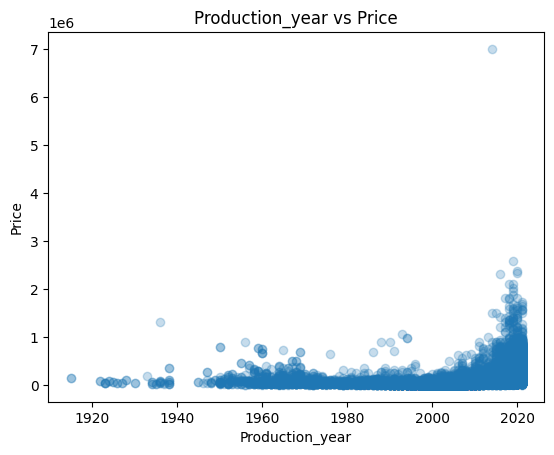

In [22]:
plt.plot(data['Production_year'], data['Price'], 'o', alpha = 0.25)
plt.xlabel('Production_year')
plt.ylabel('Price')
plt.title('Production_year vs Price')
pass

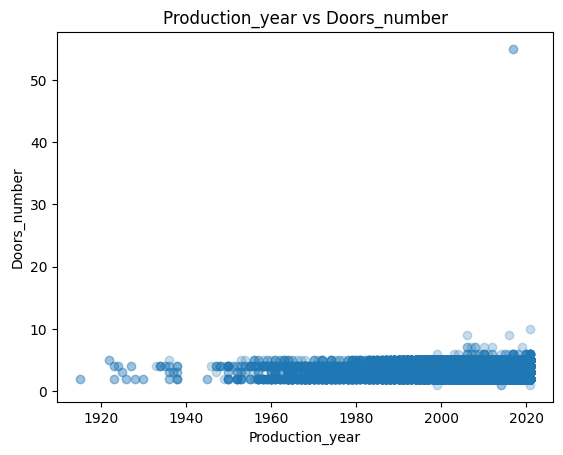

In [23]:
plt.plot(data['Production_year'], data['Doors_number'], 'o', alpha = 0.25)
plt.xlabel('Production_year')
plt.ylabel('Doors_number')
plt.title('Production_year vs Doors_number')
pass

Выведем уникальные значения для некоторых нечисловых признаков:

In [24]:
data['Vehicle_model'].unique()

array(['595', 'Other', '500', ..., 'GAZ-21', '1100', '750'], dtype=object)

In [25]:
data['Production_year'].unique()

array([2021, 1974, 2018, 2012, 2016, 2019, 2010, 2017, 2015, 2014, 2020,
       2009, 2013, 2011, 2008, 2003, 2007, 2000, 2005, 2004, 2002, 1999,
       2001, 2006, 1994, 1998, 1997, 1991, 1995, 1993, 1973, 1971, 1990,
       1987, 1992, 1996, 1983, 1979, 1986, 1989, 1970, 1984, 1988, 1980,
       1978, 1985, 1982, 1977, 1975, 1976, 1968, 1950, 1981, 1964, 1969,
       1965, 1958, 1959, 1967, 1961, 1966, 1957, 1972, 1956, 1947, 1960,
       1949, 1962, 1934, 1930, 1952, 1953, 1922, 1954, 1963, 1955, 1926,
       1923, 1925, 1938, 1945, 1915, 1924, 1928, 1951, 1936, 1948, 1937,
       1946, 1927, 1935, 1933], dtype=int64)

## Готовим данные

**Частично произведем обработку данных и выделим категориальные признаки**

In [26]:
data.dtypes

Index                        int64
Price                        int64
Currency                    object
Condition                   object
Vehicle_brand               object
Vehicle_model               object
Vehicle_version             object
Vehicle_generation          object
Production_year              int64
Mileage_km                 float64
Power_HP                   float64
Displacement_cm3           float64
Fuel_type                   object
CO2_emissions              float64
Drive                       object
Transmission                object
Type                        object
Doors_number               float64
Colour                      object
Origin_country              object
First_owner                 object
First_registration_date     object
Offer_publication_date      object
Offer_location              object
Features                    object
dtype: object

In [27]:
data['Condition'] = data['Condition'].astype('category')
data['Vehicle_brand'] = data['Vehicle_brand'].astype('category')
data['Fuel_type'] = data['Fuel_type'].astype('category')
data['Drive'] = data['Drive'].astype('category')
data['Transmission'] = data['Transmission'].astype('category')
data['Type'] = data['Type'].astype('category')
data['Colour'] = data['Colour'].astype('category')
data['Origin_country'] = data['Origin_country'].astype('category')

In [28]:
data['First_registration_date'] = data['First_registration_date'].str[-4:]
data['First_registration_date'] = data['First_registration_date'].astype('float')
data['First_registration_date'].unique

<bound method Series.unique of 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
208299       NaN
208300       NaN
208301    1977.0
208302       NaN
208303       NaN
Name: First_registration_date, Length: 208304, dtype: float64>

Избавимся от неинтересных нам колонок

In [29]:
del data['Features']
del data['Currency']
del data['Vehicle_model']
del data['Vehicle_version']
del data['Vehicle_generation']
del data['First_owner']
del data['Offer_location']
del data['Offer_publication_date']
del data['Origin_country']

**Обработка пропущенных значений**

In [30]:
data.isna().sum()

Index                           0
Price                           0
Condition                       0
Vehicle_brand                   0
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
First_registration_date    121859
dtype: int64

Удалим строки, в которых содержится малое количество незаполненных значений

In [31]:
data_na = data.copy()
data_na.drop_duplicates(subset='Index', inplace=True)
data_na.dropna(axis=0, how="all", subset=['Mileage_km'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Power_HP'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Displacement_cm3'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Drive'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Transmission'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Doors_number'], inplace=True)

In [32]:
data_na.isna().sum()

Index                           0
Price                           0
Condition                       0
Vehicle_brand                   0
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3                0
Fuel_type                       0
CO2_emissions               96295
Drive                           0
Transmission                    0
Type                            0
Doors_number                    0
Colour                          0
First_registration_date    107327
dtype: int64

**Избавляемся от выбросов**

Для начала построим графики зависимостей, чтобы оценить количество выбросов

Text(0, 0.5, 'Condition')

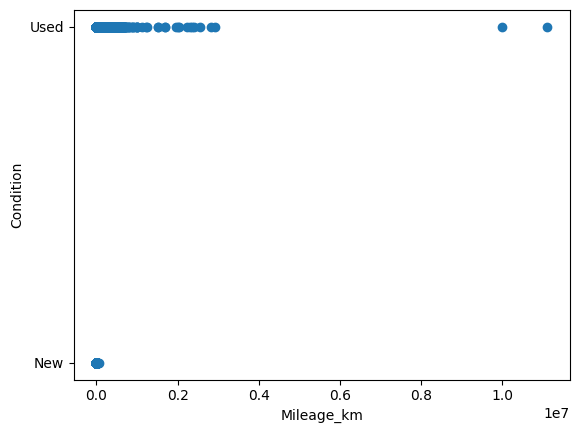

In [33]:
plt.scatter(data_na['Mileage_km'], data_na['Condition'])
plt.xlabel('Mileage_km')
plt.ylabel('Condition')

Text(0, 0.5, 'Vehicle_brand')

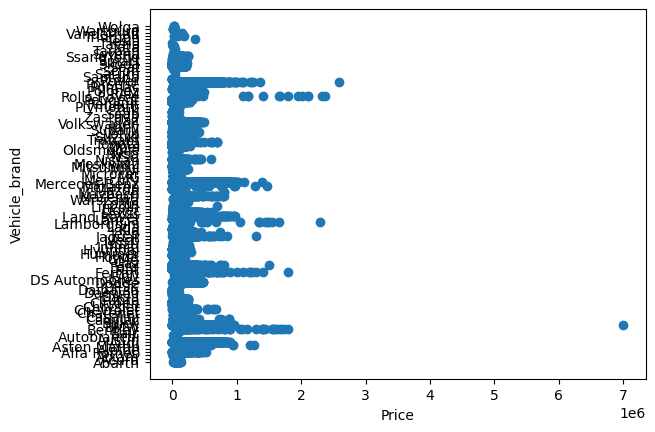

In [34]:
plt.scatter(data_na['Price'], data_na['Vehicle_brand'])
plt.xlabel('Price')
plt.ylabel('Vehicle_brand')

Text(0, 0.5, 'Mileage_km')

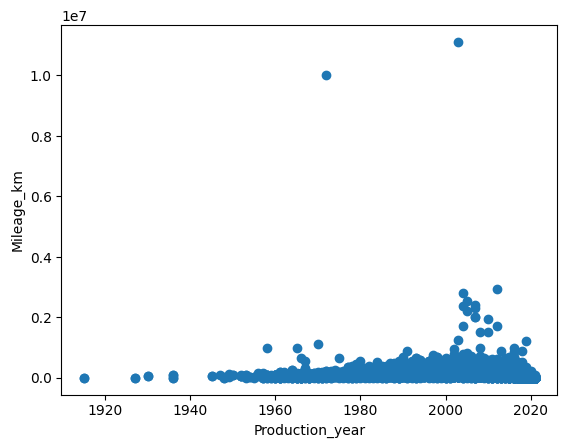

In [35]:
plt.scatter(data_na['Production_year'], data_na['Mileage_km'])
plt.xlabel('Production_year')
plt.ylabel('Mileage_km')

Text(0, 0.5, 'CO2_emissions')

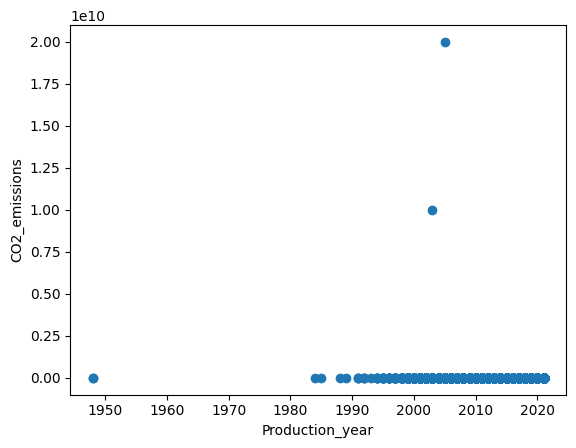

In [36]:
plt.scatter(data_na['Production_year'], data_na['CO2_emissions'])
plt.xlabel('Production_year')
plt.ylabel('CO2_emissions')

Text(0, 0.5, 'First_registration_date')

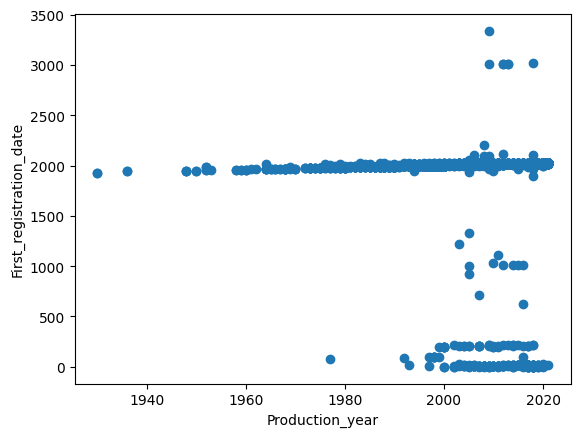

In [37]:
plt.scatter(data_na['Production_year'], data_na['First_registration_date'])
plt.xlabel('Production_year')
plt.ylabel('First_registration_date')

Text(0, 0.5, 'Type')

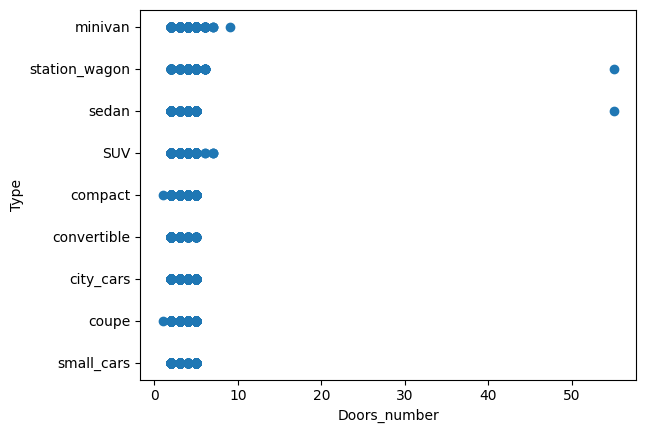

In [38]:
plt.scatter(data_na['Doors_number'], data_na['Type'])
plt.xlabel('Doors_number')
plt.ylabel('Type')

Text(0, 0.5, 'Power_HP')

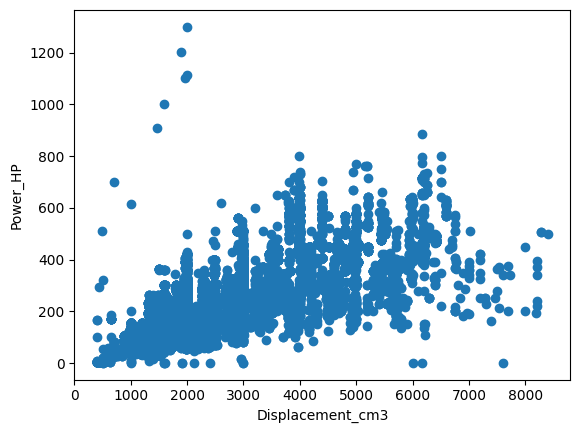

In [39]:
plt.scatter(data_na['Displacement_cm3'], data_na['Power_HP'])
plt.xlabel('Displacement_cm3')
plt.ylabel('Power_HP')

In [40]:
data_na['Price'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, 1])

0.05       6950.0
0.10       9900.0
0.20      15600.0
0.30      20900.0
0.40      27800.0
0.50      36500.0
0.70      65900.0
0.90     142800.0
0.95     199900.0
1.00    6999000.0
Name: Price, dtype: float64

In [41]:
data_na['Mileage_km'].quantile([.005,.1,.2,.3,.4,.50,.70, .8, .90, .95, .96, .98, 1])

0.005           1.0
0.100           9.0
0.200       29000.0
0.300       74000.0
0.400      112000.0
0.500      143000.0
0.700      192000.0
0.800      220000.0
0.900      259000.0
0.950      292484.6
0.960      301000.0
0.980      335000.0
1.000    11111111.0
Name: Mileage_km, dtype: float64

In [42]:
data_na['Doors_number'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, .98, 1])

0.05     3.0
0.10     4.0
0.20     4.0
0.30     5.0
0.40     5.0
0.50     5.0
0.70     5.0
0.90     5.0
0.95     5.0
0.98     5.0
1.00    55.0
Name: Doors_number, dtype: float64

In [43]:
data_na['CO2_emissions'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, .98, 1])

0.05    9.900000e+01
0.10    1.070000e+02
0.20    1.170000e+02
0.30    1.240000e+02
0.40    1.340000e+02
0.50    1.400000e+02
0.70    1.580000e+02
0.90    1.940000e+02
0.95    2.220000e+02
0.98    2.600000e+02
1.00    2.000000e+10
Name: CO2_emissions, dtype: float64

Избавимся от строк с большими: ценой, пробегом, количеством дверей и выбросами CO2. Также удалим столбец с датой первой регистрации, т.к. имеется много некорректных данных.

In [44]:
rows_to_drop = data_na[
    (data_na['Price'] > data_na['Price'].quantile(0.995)) | (data_na['Mileage_km'] > 100) & (data_na['Condition'] == "New") | 
    (data_na['Mileage_km'] > data_na['Mileage_km'].quantile(0.995)) | 
    (data_na['Doors_number'] > data_na['Doors_number'].quantile(0.995)) | 
    (data_na['CO2_emissions'] > data_na['CO2_emissions'].quantile(0.995))].index
data_na = data_na.drop(rows_to_drop)
data_na.shape

(186687, 16)

In [45]:
del data_na['First_registration_date']

После избавления от выбросов можем заполнить некоторые пропущенные значения средним.

In [46]:
data_na.isna().sum()

Index                   0
Price                   0
Condition               0
Vehicle_brand           0
Production_year         0
Mileage_km              0
Power_HP                0
Displacement_cm3        0
Fuel_type               0
CO2_emissions       94659
Drive                   0
Transmission            0
Type                    0
Doors_number            0
Colour                  0
dtype: int64

Т. к. пропущенных значений все так же много, то заполним их при помощи медианны.

In [47]:
col = ["CO2_emissions"]
data_na.fillna(data_na[col].median(axis = 0), axis=0 , inplace=True)
data_na.isna().sum()

Index               0
Price               0
Condition           0
Vehicle_brand       0
Production_year     0
Mileage_km          0
Power_HP            0
Displacement_cm3    0
Fuel_type           0
CO2_emissions       0
Drive               0
Transmission        0
Type                0
Doors_number        0
Colour              0
dtype: int64

**Обработка категориальных признаков**

In [48]:
data_na['Vehicle_brand'].unique()

['Abarth', 'Acura', 'Aixam', 'Alfa Romeo', 'Alpine', ..., 'Tesla', 'Triumph', 'Vanderhall', 'Wartburg', 'Wołga']
Length: 102
Categories (108, object): ['Abarth', 'Acura', 'Aixam', 'Alfa Romeo', ..., 'Zaporożec', 'Zastava', 'Škoda', 'Żuk']

Слишком много категорий, лучше будет отказаться от данного признака.

In [49]:
del data_na['Vehicle_brand']

К категориальным признакам 'Drive', 'Fuel_type', 'Colour' применим метод бинаризации.

In [50]:
d1 = pd.get_dummies(data_na['Drive'])
d3 = pd.get_dummies(data_na['Colour'])
d6 = pd.get_dummies(data_na['Fuel_type'])

In [51]:
data_na['Type'].unique()

['small_cars', 'coupe', 'city_cars', 'convertible', 'compact', 'SUV', 'sedan', 'station_wagon', 'minivan']
Categories (9, object): ['SUV', 'city_cars', 'compact', 'convertible', ..., 'minivan', 'sedan', 'small_cars', 'station_wagon']

In [52]:
d2 = data_na['Type'].replace("small_cars",9).replace("coupe",1).replace("city_cars",
    2).replace("convertible",3).replace("compact",4).replace("SUV",5).replace("sedan",6).replace("station_wagon",
                                                                        7).replace("minivan",8)
d2.astype('int')

0         9
1         1
3         9
5         9
7         9
         ..
208284    6
208287    6
208294    4
208296    9
208300    7
Name: Type, Length: 186687, dtype: int32

Остальные признаки заменим на числовые

In [53]:
data_na['Condition'] = pd.factorize(data_na['Condition'])[0]
data_na['Transmission'] = pd.factorize(data_na['Transmission'])[0]
d4 = data_na['Condition']
d5 = data_na['Transmission']
data_na = data_na.drop(['Type', 'Fuel_type', 'Drive', 'Colour', 'Condition', 'Transmission'], axis=1)

**Нормализация**

Нормализация числовых признаков выполняется путем линейного преобразования диапазона каждого из значений к отрезку [0; 1].

In [54]:
data_na = (data_na - data_na.min(axis=0)) / (data_na.max(axis=0) - data_na.min(axis=0))

In [55]:
data_na_norm = pd.concat((data_na, d1, d3, d4, d5, d6, d2), axis=1)
data_na_norm

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number,4x4 (attached automatically),4x4 (attached manually),...,Transmission,Diesel,Electric,Ethanol,Gasoline,Gasoline + CNG,Gasoline + LPG,Hybrid,Hydrogen,Type
0,0.000000,0.164998,1.000000,0.000000,0.110855,0.125000,0.442308,0.50,0,0,...,0,0,0,0,1,0,0,0,0,9
1,0.000005,0.082788,0.556604,0.147498,0.056967,0.087500,0.442308,0.25,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.000014,0.075857,0.915094,0.072498,0.122402,0.121000,0.442308,0.50,0,0,...,0,0,0,0,1,0,0,0,0,9
5,0.000024,0.120235,0.952830,0.115148,0.137798,0.121000,0.442308,0.50,0,0,...,0,0,0,0,1,0,0,0,0,9
7,0.000034,0.133616,0.981132,0.049998,0.110855,0.121000,0.442308,0.50,0,0,...,0,0,0,0,1,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208284,0.999923,0.051020,0.641509,0.474999,0.080062,0.255625,0.442308,0.75,0,0,...,0,0,0,0,1,0,0,0,0,6
208287,0.999938,0.037351,0.462264,0.117770,0.056967,0.250000,0.442308,1.00,0,0,...,0,0,0,0,1,0,0,0,0,6
208294,0.999971,0.001925,0.603774,0.264998,0.040801,0.089500,0.442308,1.00,0,0,...,0,0,0,0,1,0,0,0,0,4
208296,0.999981,0.002118,0.783019,0.149998,0.045420,0.087500,0.442308,0.50,0,0,...,0,0,0,0,1,0,0,0,0,9


Разбиваем наши данные на y и x:

In [56]:
X = data_na_norm.drop(['Index', 'Type'], axis=1)
y = data_na_norm['Type']
feature_names = X.columns
print(feature_names)

Index(['Price', 'Production_year', 'Mileage_km', 'Power_HP',
       'Displacement_cm3', 'CO2_emissions', 'Doors_number',
       '4x4 (attached automatically)', '4x4 (attached manually)',
       '4x4 (permanent)', 'Front wheels', 'Rear wheels', 'beige', 'black',
       'blue', 'brown', 'burgundy', 'golden', 'gray', 'green', 'other', 'red',
       'silver', 'violet', 'white', 'yellow', 'Condition', 'Transmission',
       'Diesel', 'Electric', 'Ethanol', 'Gasoline', 'Gasoline + CNG',
       'Gasoline + LPG', 'Hybrid', 'Hydrogen'],
      dtype='object')


In [57]:
X=X.to_numpy()
y=y.to_numpy()

In [58]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[0.16499807 1.         0.         ... 0.         0.         0.        ]
 [0.08278783 0.55660377 0.14749787 ... 0.         0.         0.        ]
 [0.07585676 0.91509434 0.07249768 ... 0.         0.         0.        ]
 ...
 [0.0019253  0.60377358 0.26499816 ... 0.         0.         0.        ]
 [0.00211783 0.78301887 0.14999787 ... 0.         0.         0.        ]
 [0.0200231  0.51886792 0.1587929  ... 0.         0.         0.        ]]

[9 1 9 ... 4 9 7]

(186687, 36)

(186687,)



Разделим наш dataset на обучающую и тестовую выборку:

In [59]:
import sys
!{sys.executable} -m pip install scikit-learn

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)
N_train, _ = X_train.shape 
N_test, _ = X_test.shape 

N_train, N_test

(140015, 46672)

Оказалось, что наши данные содержат незначительное количество полей типа nan. Заменим их на данные из других строк таблицы (таких значения всего 4, на общую картину это никак не повлияет):

In [61]:
print(np.argwhere(np.isnan(X_train)))
for i, j in np.argwhere(np.isnan(X_train)):
    X_train[i][j] = X_train[0][j]

print(np.argwhere(np.isnan(X_test)))
for i, j in np.argwhere(np.isnan(X_test)):
    X_test[i][j] = X_test[0][j]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[]
[]
(140015, 36)
(140015,)
(46672, 36)
(46672,)


Интерпретируем все значения `y` как целые числа:

In [62]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [64]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [65]:
print(f"{err_train}")
print(f"{err_test}")

0.3737813805663679
0.4478059650325677


In [66]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[ 2273   171   244   252   319   530   187    17    11]
 [   46 11682    67  2150   484   252   560   313   285]
 [  589    98   662    67    20    74     4     5    13]
 [  112  3080    56 11505  1847  1010  3351   934   113]
 [   42   403     2  1672 22952   704  1937   598    13]
 [  128   225    28  1210  1988 14904  3083   616     2]
 [   33   806     7  3232  3280  2183 16637  1511    15]
 [   17   700     9  2251  1188   944  3798  5876     6]
 [   56  1845    41   293    64    72    31    41  1189]]

[[ 695   52  121   85  125  198   49    5    2]
 [  17 3496   29  941  192   96  227  124  157]
 [ 226   45  192   25    9   14    3    3    7]
 [  47 1196   15 3026  759  421 1372  406   46]
 [  13  167    2  679 7143  299  888  251    2]
 [  56   91    8  450  734 4680 1191  222    1]
 [  11  302    4 1341 1219  853 4763  663    7]
 [   9  275    3  899  444  355 1488 1439    0]
 [  25  745   20   91   25   34   10    9  338]]



Улучшить результат не получилось.

In [67]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(X_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

## Другие алгоритмы обучения:

### SVC:

In [69]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.5027389922508303
0.5044137812821392


### Random Forest:

In [70]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.0003713887797735957
0.3059650325677066


### Extremely Randomized Trees:

In [71]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.0003713887797735957
0.349010113129928


### AdaBoost (работает очень медленно):

In [72]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.5971788736921044
0.59457490572506


### GBT (работает очень, очень медленно):

In [73]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.3027818448023426
0.3307122043195063


Наилуший результат показывает Random Forest и GBT. Ошибка на тестовой выборке составляет ~ 0.305. При этом, на обучение алгоритмом Random Forest затрачивается намного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.
